<a href="https://colab.research.google.com/github/ricardosimplicio/PUC-Rio-MVP-Analise_de_dados_e_Boas_Praticas/blob/main/Aula_2_Constru%C3%A7%C3%A3o_de_Gr%C3%A1ficos_B%C3%A1sicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Evolução da População Brasileira em Cada Região

In [ ]:
#manipulação de data frame
import pandas as pd

#construção de gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl

#exibição de dados no jupiter  notebook
from IPython.display import display


###Carregar Dados

In [ ]:
from google.colab import files

uploaded = files.upload() #carregando da propria máquina "D:\Pessoal\PUC_RIO\Vizualização de Dados\ ...
                          # ...Construção de Gráficos Básicos para Apoiar Tarefas de Análise\POPULAÇÃO_UFs-1980-2030_EM 1º DE JULHO EDITADO.csv"

file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name, header=0)


Saving POPULAÇÃO_UFs-1980-2030_EM 1º DE JULHO EDITADO.csv to POPULAÇÃO_UFs-1980-2030_EM 1º DE JULHO EDITADO.csv


In [ ]:
cols_to_convert = df.columns[3:54]
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df.head()

,REGIÃO,ESTADO,1980,1981,1982,1983,1984,1985,1986,1987,...,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031
0,Região Norte,Rondônia,489253,549675,611185,673123,736190,798713,859053,918465,...,1603230,1609117,1614764,1620149,1625245,1630021,1634457,1638532,1642229,1645530
1,Região Norte,Acre,300189,311583,323182,334863,346756,358546,369925,381129,...,797111,803393,809420,815167,820605,825702,830437,834786,838732,842254
2,Região Norte,Amazonas,1424800,1490051,1556478,1623367,1691475,1758995,1824159,1888320,...,3894301,3923994,3952483,3979648,4005351,4029445,4051821,4072379,4091030,4107680
3,Região Norte,Roraima,78866,91847,105062,118369,131918,145350,158314,171078,...,505024,509975,514726,519255,523541,527558,531289,534717,537827,540603
4,Região Norte,Pará,3390803,3540968,3693835,3847768,4004506,4159890,4309852,4457505,...,8480623,8542840,8602533,8659452,8713307,8763791,8810676,8853751,8892830,8927718


In [ ]:
print(df.head())

         REGIÃO    ESTADO     1980     1981     1982     1983     1984  \
0  Região Norte  Rondônia   489253   549675   611185   673123   736190   
1  Região Norte      Acre   300189   311583   323182   334863   346756   
2  Região Norte  Amazonas  1424800  1490051  1556478  1623367  1691475   
3  Região Norte   Roraima    78866    91847   105062   118369   131918   
4  Região Norte      Pará  3390803  3540968  3693835  3847768  4004506   

      1985     1986     1987  ...     2022     2023     2024     2025  \
0   798713   859053   918465  ...  1603230  1609117  1614764  1620149   
1   358546   369925   381129  ...   797111   803393   809420   815167   
2  1758995  1824159  1888320  ...  3894301  3923994  3952483  3979648   
3   145350   158314   171078  ...   505024   509975   514726   519255   
4  4159890  4309852  4457505  ...  8480623  8542840  8602533  8659452   

      2026     2027     2028     2029     2030     2031  
0  1625245  1630021  1634457  1638532  1642229  1645530  


##Criando um Gráfico de Barras

In [ ]:
unique_regions = df['REGIÃO'].unique()
unique_regions_list = list(unique_regions)
print(unique_regions_list)

['Região Norte', 'Região Nordeste', 'Região Sudeste', 'Região Sul', 'Região Centro-Oeste']


In [ ]:
df_centro_oeste = df[df['REGIÃO'] == 'Região Centro-Oeste']
print(df_centro_oeste.head())

                 REGIÃO           ESTADO     1980     1981     1982     1983  \
23  Região Centro-Oeste  MatoGrossodoSul  1364501  1405333  1446899  1488756   
24  Região Centro-Oeste       MatoGrosso  1134479  1219087  1305216  1391947   
25  Região Centro-Oeste            Goiás  3109175  3198706  3289848  3381626   
26  Região Centro-Oeste  DistritoFederal  1172582  1214258  1256685  1299407   

       1984     1985     1986     1987  ...     2022     2023     2024  \
23  1531375  1573625  1614402  1654550  ...  2594707  2608590  2621910   
24  1480258  1567806  1652299  1735491  ...  3422964  3447935  3471894   
25  3475076  3567719  3657128  3745162  ...  6705440  6751624  6795935   
26  1342908  1386033  1427654  1468633  ...  3083417  3111665  3138766   

       2025     2026     2027     2028     2029     2030     2031  
23  2634611  2646629  2657893  2668355  2677967  2686687  2694472  
24  3494739  3516355  3536617  3555435  3572724  3588409  3602411  
25  6838188  6878165  69

In [ ]:
import os

plt.savefig("/content/barras-regioes.pdf")
plt.savefig("/content/barras-regioes.svg")
plt.savefig("/content/barras-regioes.png", dpi = 150, format = "png")


<Figure size 640x480 with 0 Axes>

In [ ]:
regioes = df['REGIÃO'].unique()

# Configurações Inicial do gráfico
fig, ax = plt.subplots(len(regioes), 1, figsize=(15, 12), sharex=True, sharey=True)
plt.style.use('ggplot')
plt.rc("axes", facecolor="#fafafa", grid=True)
plt.rc("grid", color="#f0f0f0")
corDefault = '#6688AA'

for i, regiao in enumerate(regioes):
    # Filtra a região
    df_regiao = df[df['REGIÃO'] == regiao]

    # # Dados de população a cada coluna
    anos = df.columns[2:]  # Pega todas as colunas exceto a coluna 'REGIÃO'
    populacao = pd.to_numeric(df_regiao.iloc[0, 2:], errors='coerce') / 1e6  # Pega os dados da população e divide por 1e6

    # Criação do gráfico para a região de em questão
    ax[i].bar(anos, populacao, color=corDefault)
    ax[i].set_title(f'População em {regiao}')
    ax[i].set_ylabel('Pop. (em Milhões)')

# Configura o rótulo do eixo x
ax[-1].set_xlabel('Ano', fontsize=8)

# Ajusta o tamanho da fonte dos rótulos do eixo X

# Atualiza os rótulos do eixo X para mostrar apenas os dois últimos dígitos dos anos
anos = df.columns[2:]  # Anos a partir das colunas
anos_dois_digitos = [f'{ano[-2:]}' for ano in anos]  # Obtém os dois últimos dígitos dos anos

# Define os rótulos dos ticks com os dois últimos dígitos dos anos
ax[-1].set_xticks(anos)  # Define as posições dos ticks (as posições dos anos)
ax[-1].set_xticklabels(anos_dois_digitos)  # Define os rótulos dos ticks com os dois últimos dígitos

plt.savefig("/content/barras-regioes.pdf")
plt.savefig("/content/barras-regioes.svg")
plt.savefig("/content/barras-regioes.png", dpi = 150, format = "png")


# Ajusta o layout para evitar sobreposição
plt.tight_layout()

plt.show()

NameError: name 'df' is not defined

##Criando um Gráfico de Linha

<ipython-input-11-26688ebba0b6>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(anos_dois_digitos, fontsize=8)


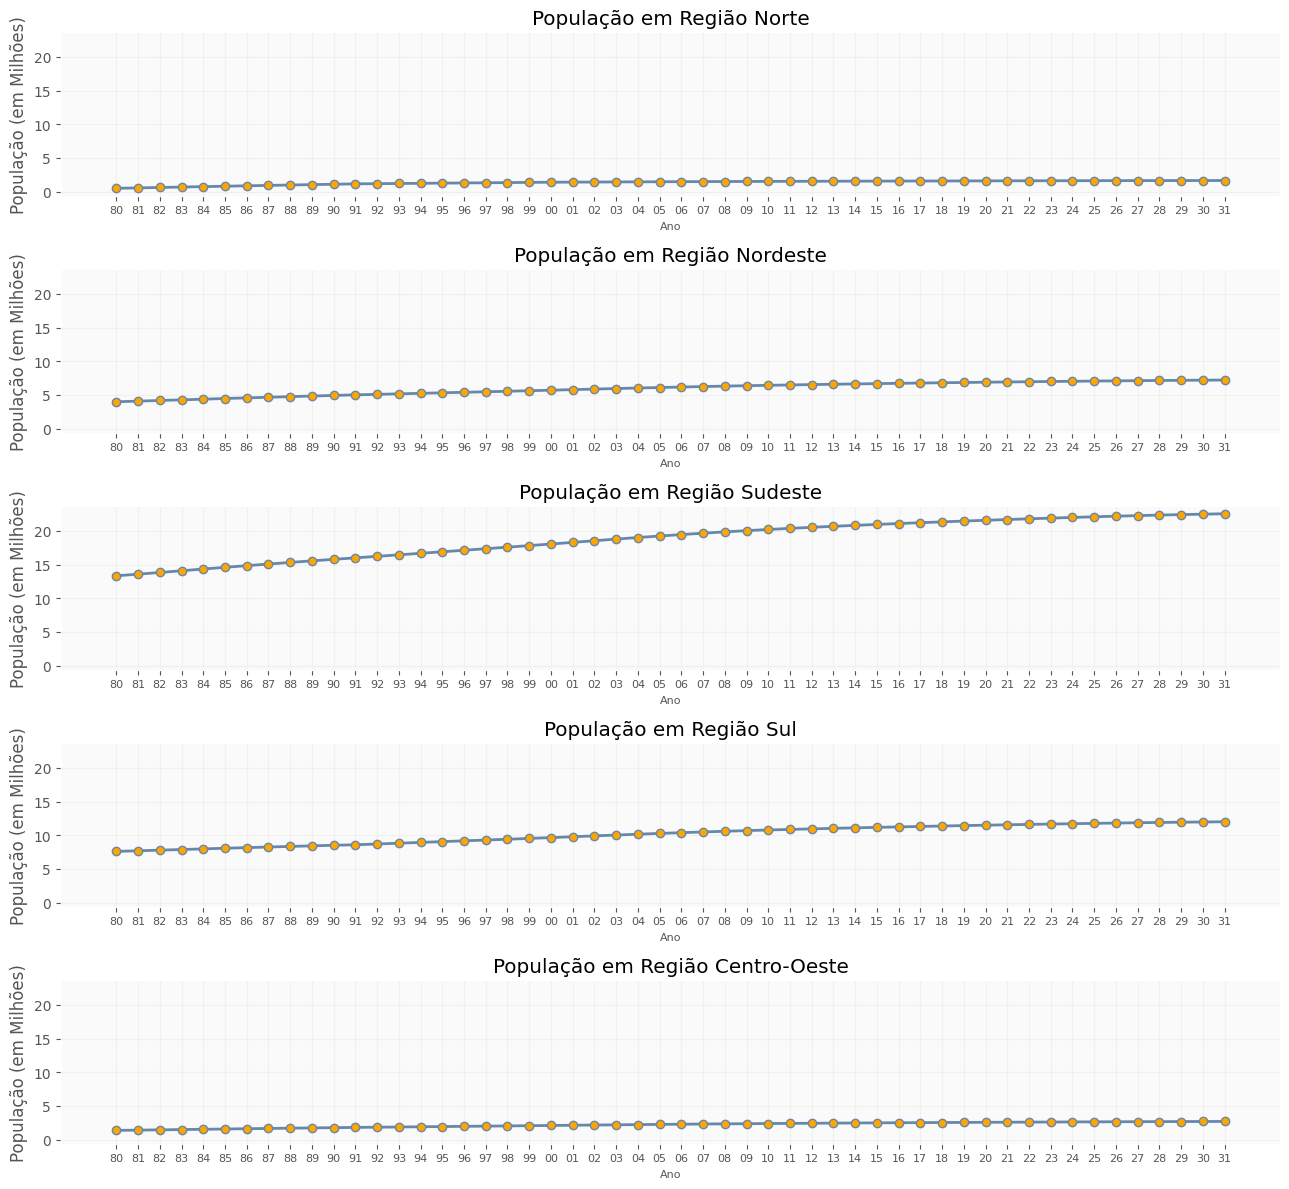

In [ ]:
# Configurações Inicial do gráfico
fig, ax = plt.subplots(len(regioes), 1, figsize=(13, 12), sharex=False, sharey=True)
plt.style.use('ggplot')
plt.rc("axes", facecolor="#fafafa", grid=True)
plt.rc("grid", color="#f0f0f0")
corDefault = '#6688AA'

for i, regiao in enumerate(regioes):
    # filtra a regiao
    df_regiao = df[df['REGIÃO'] == regiao]

    # Dados de população a cada coluna
    anos = df.columns[2:]  # Pega todas as colunas exceto a coluna 'REGIÃO'
    populacao = pd.to_numeric(df_regiao.iloc[0, 2:], errors='coerce') / 1e6  # Pega os dados da população e divide por 1e6

    # Criação do gráfico para a região de em questão
    ax[i].plot(anos, populacao, color=corDefault, marker='o', markerfacecolor='#FFA500', linestyle='-', linewidth=2, markersize=6)
    ax[i].set_title(f'População em {regiao}')
    ax[i].set_ylabel('População (em Milhões)')
    ax[i].set_xlabel('Ano', fontsize=8)
    anos = df.columns[2:]
    anos_dois_digitos = [f'{ano[-2:]}' for ano in anos]
    ax[i].set_xticklabels(anos_dois_digitos, fontsize=8)
    ax[i].set_xticks(anos)

plt.savefig("/content/linha-regioes.pdf")
plt.savefig("/content/linha-regioes.svg")
plt.savefig("/content/linha-regioes.png", dpi = 150, format = "png")

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

plt.show()

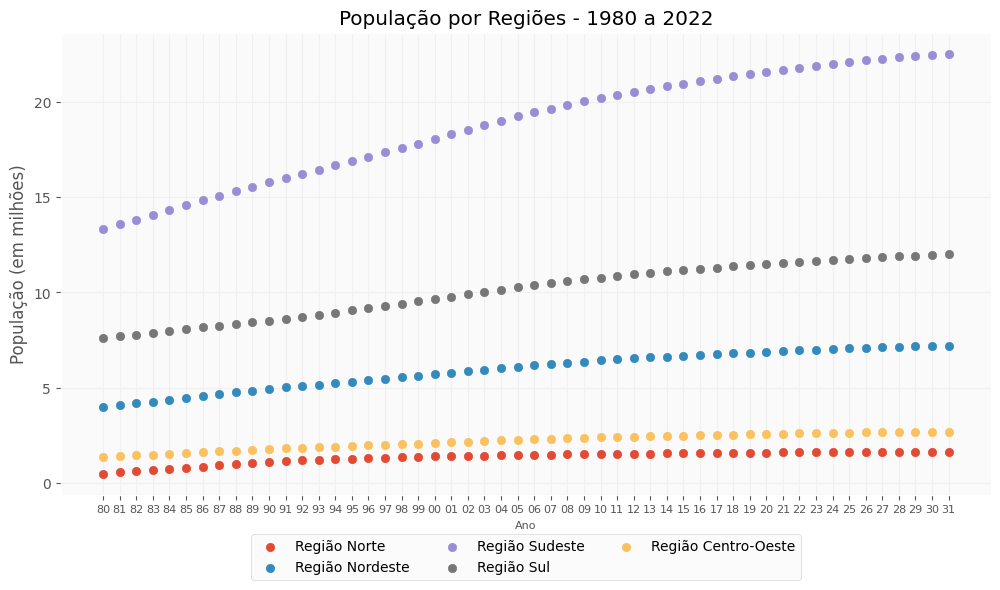

In [ ]:
anos = df.columns[2:]
plt.figure(figsize=(12, 6))

for regiao in df['REGIÃO'].unique():
    df_regiao = df[df['REGIÃO'] == regiao]
    populacao = pd.to_numeric(df_regiao.iloc[0, 2:], errors='coerce') / 1e6
    plt.scatter(anos,populacao, label = regiao)


# Criação do gráfico para a região de em questão
    plt.title('População por Regiões - 1980 a 2022')
    plt.xlabel("Anos")
    plt.ylabel('População (em milhões)')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.20), ncol=3)
    plt.xlabel('Ano', fontsize=8)
    anos_dois_digitos = [f'{ano[-2:]}' for ano in anos]
    plt.xticks(ticks=anos, labels=anos_dois_digitos, fontsize=8)
    #plt.xticks_(anos_dois_digitos)


plt.savefig("/content/dispersao-regioes.pdf")
plt.savefig("/content/dispersao-regioes.svg")
plt.savefig("/content/dispersao-regioes.png", dpi=150, format="png")

# Ajusta o layout para evitar sobreposição
#plt.tight_layout()
plt.show()


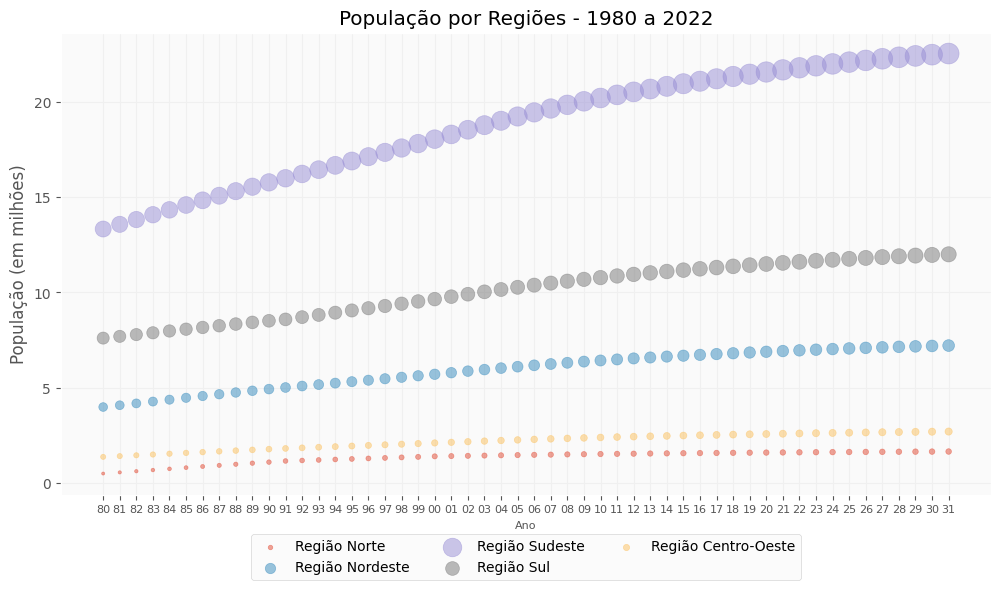

In [ ]:
anos = df.columns[2:]
plt.figure(figsize=(12, 6))

for regiao in df['REGIÃO'].unique():
    df_regiao = df[df['REGIÃO'] == regiao]
    populacao = pd.to_numeric(df_regiao.iloc[0, 2:], errors='coerce') / 1e6
    plt.scatter(anos, populacao, s=populacao * 10, alpha=0.5, label=regiao)


# Criação do gráfico para a região de em questão
    plt.title('População por Regiões - 1980 a 2022')
    plt.xlabel("Anos")
    plt.ylabel('População (em milhões)')
    plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.20), ncol=3)
    plt.xlabel('Ano', fontsize=8)
    anos_dois_digitos = [f'{ano[-2:]}' for ano in anos]
    plt.xticks(ticks=anos, labels=anos_dois_digitos, fontsize=8)
    #plt.xticks_(anos_dois_digitos)


plt.savefig("/content/dispersao-regioes.pdf")
plt.savefig("/content/dispersao-regioes.svg")
plt.savefig("/content/dispersao-regioes.png", dpi=150, format="png")

# Ajusta o layout para evitar sobreposição
#plt.tight_layout()
plt.show()

In [ ]:
# Define as cores por continenetes

continenetes = sorted(set(ie_wide_2020["Continente"]))
dictCoresContinentes = dict(zip(continenetes, coresViridis))
#Prepara a figura
Fig, axs = plt.subplots(nrows= 2, ncols=2, figsize=(15, 10),
                        sharex = Trues, sharey = True)

#Plota o gráfico de dispersão por continentes
for i in range(0, 2):
  for j in range(0, 3):
    k = i * 3 + j
    if k < len(continentes):
      dados = ie_wide_2020[ie_wide_2020["Continent"] == continente)]
      axs[i,j].scatter(x = dados["Import of goods and services (% of GDP)"]
                       y = dados["Exporte if goods and services (% of GPD)"],
                       color = dictCoresContinentes[continentes],
                       alpha = 0.75
                       label = continente)
      axs[i, j].set_title(continente)

      axs[i, j].set_xlabel('importação (% do pib)')
      axs[i, j].set_ylabel('exportação (% do pib)')
    else:
      axs[im j].set_visible(False)



